# SI 618 Day 9: Dimension Reduction

Version 2021.03.21.1.CT

## Task (to generate data for use later in today's class):
Fill in the [spreadsheet](https://docs.google.com/spreadsheets/d/1cm33K2dg3vVGWX8Bv0R7_QA3UN5r3IEznYWXbtcbWEs/edit?usp=sharing) with your music preferences.  Rate each genre on a scale of 1 to 10, with 1 being "no way" and 10 being "the best".  Note that you are indicating your preference for each genre on a scale of 1-10; 
you are not ranking the genres from 1-10.  Thus, you can have all 10s if you love all genres of music, or all 1s if you hate music in general.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import manifold

## Demo

Let's set up a really simple dataframe to play with:

In [2]:
demo = pd.DataFrame({'a':[1,2,3],'b':[1,4,6],'c':[2,4,6]},index=['Chris','Mauli','Alex'])

In [3]:
demo

,a,b,c
Chris,1,1,2
Mauli,2,4,4
Alex,3,6,6


And then let's split the dataframe into X and y matrices:

In [4]:
demo_X = demo.values

In [5]:
demo_X

array([[1, 1, 2],
       [2, 4, 4],
       [3, 6, 6]])

In [6]:
demo_y = demo.index

In [7]:
demo_y

Index(['Chris', 'Mauli', 'Alex'], dtype='object')

## Multi-dimensional scaling (MDS)

In [8]:
nmds = manifold.MDS(n_components=2,
                    metric=False, 
                    max_iter=3000, 
                    eps=1e-9, 
                    random_state=42, 
                    dissimilarity='euclidean', 
                    n_jobs=1)

In [9]:
npos = nmds.fit_transform(demo_X)

/Users/nathanielmay/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_mds.py:419: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


In [10]:
npos

array([[ 0.30946596,  0.29784584],
       [ 0.11775658, -0.34227884],
       [-0.42722732,  0.04444687]])

In [11]:
npos_labelled = pd.concat([pd.DataFrame({'who':demo_y}),pd.DataFrame(npos)],axis=1)

In [12]:
npos_labelled.columns = ['who','mds1','mds2']

In [13]:
npos_labelled

,who,mds1,mds2
0,Chris,0.309466,0.297846
1,Mauli,0.117757,-0.342279
2,Alex,-0.427227,0.044447


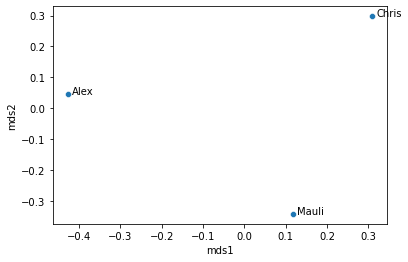

In [14]:
# Based on https://stackoverflow.com/questions/46027653/adding-labels-in-x-y-scatter-plot-with-seaborn
p1 = sns.scatterplot(data=npos_labelled,x='mds1',y='mds2')
for line in range(0,npos_labelled.shape[0]):
     p1.text(npos_labelled['mds1'][line]+0.01, npos_labelled['mds2'][line], 
     npos_labelled['who'][line], horizontalalignment='left', 
     size='medium', color='black')

In [15]:
def labelled_scatterplot(data=None,x=None,y=None,labs=None):
    p1 = sns.scatterplot(data=data,x=x,y=y)
    for line in range(0,data.shape[0]):
        p1.text(data[x][line]+0.01, data[y][line], 
                data[labs][line], horizontalalignment='left', 
                size='medium', color='black')

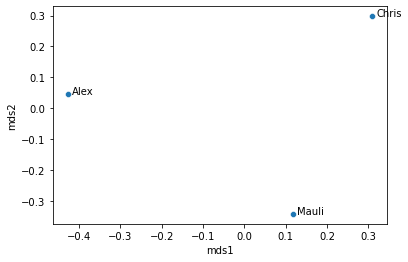

In [16]:
labelled_scatterplot(npos_labelled,'mds1','mds2','who')

## Principal Components Analysis (PCA)

In [17]:
demo

,a,b,c
Chris,1,1,2
Mauli,2,4,4
Alex,3,6,6


In [18]:
np.var([-1.29777,.016222,1.135549])

0.9889454738615555

In [19]:
from sklearn.preprocessing import scale
scale(demo_X)

array([[-1.22474487, -1.29777137, -1.22474487],
       [ 0.        ,  0.16222142,  0.        ],
       [ 1.22474487,  1.13554995,  1.22474487]])

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(scale(demo_X))

In [21]:
X_pca

array([[ 2.16341882, -0.06188307],
       [-0.09352034,  0.13255088],
       [-2.06989849, -0.07066781]])

In [22]:
X_pca_labelled = pd.concat([pd.DataFrame({'who':demo_y}),pd.DataFrame(X_pca,columns=['pca1','pca2'])],axis=1)

In [23]:
X_pca_labelled

,who,pca1,pca2
0,Chris,2.163419,-0.061883
1,Mauli,-0.093520,0.132551
2,Alex,-2.069898,-0.070668


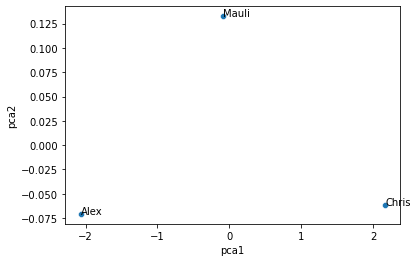

In [24]:
labelled_scatterplot(data=X_pca_labelled,x='pca1',y='pca2',labs='who')

In [25]:
pca.explained_variance_

array([4.48680341, 0.01319659])

In [26]:
np.cov(X_pca)

array([[ 2.47598426, -0.25153836, -2.2244459 ],
       [-0.25153836,  0.0255541 ,  0.22598426],
       [-2.2244459 ,  0.22598426,  1.99846164]])

In [27]:
pca.explained_variance_ratio_

array([0.99706742, 0.00293258])

### Question: 
What's the expected explained variance ratio for each variable?

**Answer:** for n variables, the expected explained variance for each variable is 1/n.

## t-SNE

In [28]:
# import t-SNE package from sklearn
from sklearn.manifold import TSNE

In [29]:
tsne = TSNE(n_components=2, random_state=0)
X = demo_X.copy()
X_2d = tsne.fit_transform(X)

In [30]:
X_2d

array([[-1015.70056,  1338.9812 ],
       [ -387.996  ,  -373.31616],
       [-2184.7456 ,   -60.5658 ]], dtype=float32)

In [31]:
tsne_labelled = pd.concat([pd.DataFrame({'who':demo_y}),pd.DataFrame(X_2d,columns=['d1','d2'])],axis=1)

In [32]:
tsne_labelled

,who,d1,d2
0,Chris,-1015.700562,1338.981201
1,Mauli,-387.996002,-373.316162
2,Alex,-2184.745605,-60.565800


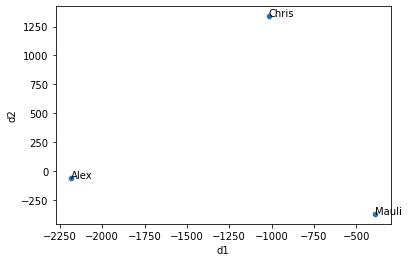

In [33]:
labelled_scatterplot(data=tsne_labelled,x='d1',y='d2',labs='who')

(copy to chat:)
https://cs.stanford.edu/people/karpathy/tsnejs/csvdemo.html

# In your groups

Let's read the CSV file of the music data we generated at the start of today's class:

In [68]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vR4YaVmpag6ucq-Q62adFm8oQz2YQRE7jsiTdE3S8-uxEj8dV6W_rbLHh0AMM4AKeibsDZLWXHQU0rT/pub?gid=0&single=true&output=csv"
music = pd.read_csv(url)

In [56]:
music

,Name,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,Rock
0,Chris T,7,10,4,3,6,4,10,4,6,8
1,Taylor F.,8,6,5,5,10,6,4,9,8,10
2,Briana W,6,3,2,3,2,10,7,6,8,9
3,Katie H.,3,5,6,5,6,8,2,9,9,10
4,N8 May,4,5,2,10,2,8,3,4,6,8
5,Yijing C,4,10,6,9,7,2,4,3,4,8
6,Dan K,8,7,9,5,8,9,10,8,7,4
7,Jiaoyang H,8,9,5,6,6,7,7,5,9,8
8,Yanisa K,5,8,7,8,7,9,8,7,10,8
9,Cameron M,6,8,9,7,3,8,9,10,3,3


## Task
Create X (features matrix) and y (labels matrix) from the `music` dataframe:

In [70]:
# Insert your code here
mus = music.set_index('Name')
mus_X = mus.values
mus_y = mus.index


Index(['Chris T', 'Taylor F.', 'Briana W', 'Katie H.', 'N8 May', 'Yijing C',
       'Dan K', 'Jiaoyang H', 'Yanisa K', 'Cameron M', 'Sean C', 'Allen M',
       'Sasha K', 'Ted', 'Soyoung L', 'Selina L', 'Bulgan J', 'Sam S',
       'Sarah F', 'Antonia S', 'Ed K', 'Sam O', 'Sush R', 'Sidra E',
       'Muhammed H', 'Dylan C', 'Lingyu Zhao', 'DZ', 'Erin M', 'Amanda H',
       'Malvika', 'Shirley W', 'Yucan D', 'Gowri', 'Michael K', 'Christian W',
       'Zhenghao T', 'Xun Zhou', 'Scott D', 'Hsiao-Han T', 'Qiaoning Zhang',
       'Gabriel Guerra', 'Wenxuan Zhang', 'Sam Lee', 'Obama Sagan ', 'Tasha T',
       'Qi Sun'],
      dtype='object', name='Name')

## Task
Perform a multi-dimensional scaling on the music data.  Should you use metric or non-metric MDS?  Do the 
results differ between metric and non-metric?  Visualize your results.

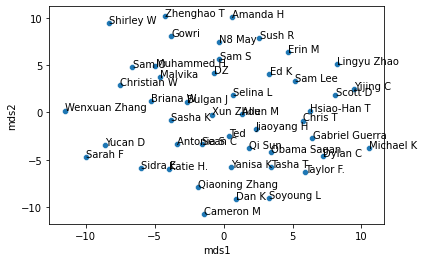

In [75]:
nmds = manifold.MDS(n_components=2,
                    metric=True, 
                    max_iter=3000, 
                    eps=1e-9, 
                    random_state=42, 
                    dissimilarity='euclidean', 
                    n_jobs=1)

npos = nmds.fit_transform(mus_X)

npos_labelled = pd.concat([pd.DataFrame({'Name':mus_y}) ,pd.DataFrame(npos)],axis=1)
npos_labelled.columns = ['Name','mds1','mds2']
labelled_scatterplot(npos_labelled,'mds1','mds2','Name')

I think of the 1-10 rating as linear, so I would use a metric MDS. The result differ greatly between the two.

## Task
Perform a principal components analysis (PCA) on the music data.  Do you think you should scale the data before you
do the PCA?  How many principal components should you retain (hint: look at a scree plot and/or eigenvalues, a.k.a. the explained_variance_ attribute of the PCA model).  Visualize your results.

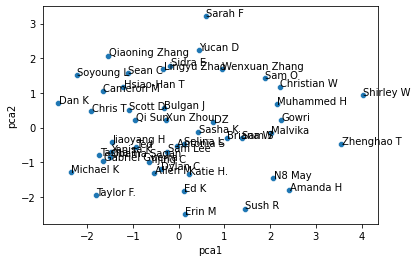

In [85]:
pca2 = PCA(n_components=6)
X_pca2 = pca.fit_transform(scale(mus_X))

X_pca2_labelled = pd.concat([pd.DataFrame({'Name':mus_y}),pd.DataFrame(X_pca2,columns=['pca1','pca2'])],axis=1)
labelled_scatterplot(data=X_pca2_labelled,x='pca1',y='pca2',labs='Name')

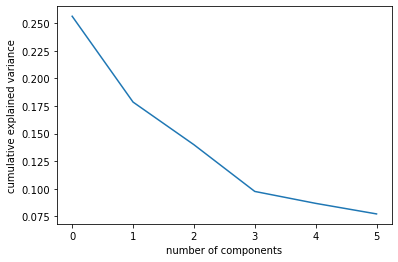

In [86]:
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
plt.plot(pca2.fit(mus_X).explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [93]:
print('Expected explained variance: ', 1 / len(mus.columns))

Expected explained variance:  0.1


We should use 3 principal coponents. The 4th, although the elbow, falls below the expected explained variance of 0.1

## Task
Perform a t-SNE analysis of the music data.  Experiment with different hyperparameters (i.e. perplexity and n_iter) to see how your solution changes.  Visualize your results.

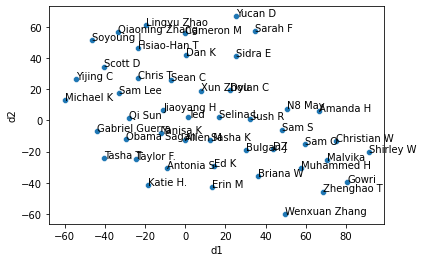

In [110]:
# Insert your code here
tsne2 = TSNE(n_components=2, random_state=0, perplexity=20)
X2 = mus_X.copy()
X2_2d = tsne2.fit_transform(X2)

tsne_labelled = pd.concat([pd.DataFrame({'Name':mus_y}),pd.DataFrame(X2_2d,columns=['d1','d2'])],axis=1)
labelled_scatterplot(data=tsne_labelled,x='d1',y='d2',labs='Name')

## Task
Compare the three analyses (MDS, PCA, and t-SNE).  Comment on similarities and differences.  What do you think the best technique is to use with the music data?

Although PCA and t-SNE shared simliar results (at least with respect to those most similiar to myself), I found that MDS most closely associated Sam S and myself, which I feel is more acurate after comparing our responses. 

Only after setting the perplexity to 20 did I see result most consistent across all exercises, therefore I would choose t-SNE with perplexity=2.0

## Stretch task

Use a Pipeline to perform a PCA on the music data.

In [40]:
# Insert your code here

# Clustering

## A few words about pipelines

Consider the following pipeline:

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipe = Pipeline([
    ('scale',StandardScaler()),
    ('pca', PCA(n_components=5,random_state=42)),
])

The pipeline can be queried by using `get_params()`:

In [42]:
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('pca', PCA(n_components=5, random_state=42))],
 'verbose': False,
 'scale': StandardScaler(),
 'pca': PCA(n_components=5, random_state=42),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': 5,
 'pca__random_state': 42,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False}

The `named_steps` attribute holds (unsurprisingly) the named steps of the pipeline:

In [43]:
pipe.named_steps

{'scale': StandardScaler(), 'pca': PCA(n_components=5, random_state=42)}

The steps themselves can be accessed as attributes of the `named_steps` property:

In [44]:
pipe.named_steps.pca

PCA(n_components=5, random_state=42)

And specifics about the step can be modified by assigning new values to them:

In [45]:
pipe.named_steps.pca.n_components=3

In [46]:
pipe.named_steps.pca

PCA(n_components=3, random_state=42)

And you can also use the <estimator>__<parameter> syntax:


In [47]:
pipe.set_params(pca__n_components=2)

Pipeline(steps=[('scale', StandardScaler()),
                ('pca', PCA(n_components=2, random_state=42))])

Ok, on to today's notebook, which consists of two tasks.  First, let's load the music data we generated in an earlier class:

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns

In [49]:
# let's use these imports to make life easier

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [50]:
music = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vR4YaVmpag6ucq-Q62adFm8oQz2YQRE7jsiTdE3S8-uxEj8dV6W_rbLHh0AMM4AKeibsDZLWXHQU0rT/pub?gid=0&single=true&output=csv')

In [51]:
music.head()

,Name,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,Rock
0,Chris T,7,10,4,3,6,4,10,4,6,8


## Task
Create a feature matrix and a labels matrix from the music dataframe.  Assign them to `X` and `y`, respectively (note the use of uppercase X and lowercase y).

In [52]:
# Insert your code here

## Task

Create a pipeline that does the following:

1. Fills NA values with 1
2. Scales each variable to mean=0 and variance=1
3. Uses PCA to reduce the number of dimensions to 5; make sure you set random_state to some constant to allow you to reproduce your results
4. Uses the PCA projections (i.e. the transformed X matrix) as input to agglomerative clustering

Report the percent variance that is retained in the 5-dimensional PCA.

Use the output from the pipeline to create a visualization of the resulting clustering (i.e. create a dendrogram).  Annotate the visulization with a horizontal line that "cuts" the tree at a reasonable level and provide a written summary of each cluster's membership.  Save the resulting dendrogram to a PDF file called 'music_clusters.pdf' (hint: use `plt.savefig()`)

In [53]:
# Insert your code here

## Task

Conduct a k-means clustering of the music data.  Preprocess the data by scaling it and performing a PCA and retaining 2 dimensions.  Use the PCA scores as input to the clustering. Use silhouette plots to determine the optimal number of clusters.  If time permits, experiment with changing the number of principal components.  Be sure to set your random_state to allow you to reproduce your results.

Note that you do not need to use a pipeline, although doing so may make your life easier.

In [54]:
# Insert your code here